## Project: Animate a scatter plot

#### this is a reproduction of Hans Rosling's animation

## Step 1

In [1]:
import pandas as pd

fert = pd.read_csv('~/Documents/SpicedAcademy/Week1/gapminder_total_fertility.csv', index_col=0)

In [2]:
fert.head(3)

,1800,1801,1802,1803,1804,1805,1806,1807,1808,1809,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
Total fertility rate,,,,,,,,,,,,,,,,,,,,,
Abkhazia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Afghanistan,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,...,6.7,6.46,6.2,5.93,5.66,5.4,5.14,4.9,4.68,4.47
Akrotiri and Dhekelia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
fert.loc['Germany']  #out of curiousity

1800    5.40
1801    5.40
1802    5.39
1803    5.39
1804    5.38
        ... 
2011    1.40
2012    1.41
2013    1.42
2014    1.43
2015    1.44
Name: Germany, Length: 216, dtype: float64

## Step 2

In [4]:
life = pd.read_excel('~/Documents/SpicedAcademy/Week1/gapminder_lifeexpectancy.xlsx', index_col=0)

In [5]:
life.head(3)

,1800,1801,1802,1803,1804,1805,1806,1807,1808,1809,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
Life expectancy,,,,,,,,,,,,,,,,,,,,,
Abkhazia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Afghanistan,28.21,28.2,28.19,28.18,28.17,28.16,28.15,28.14,28.13,28.12,...,52.4,52.8,53.3,53.6,54.0,54.4,54.8,54.9,53.8,52.72
Akrotiri and Dhekelia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Step3

In [6]:
print(life.shape)

(260, 217)


In [7]:
print(fert.shape)  #the two table have different amounts of columns

(260, 216)


## Step 4

In [8]:
fert.columns

Index(['1800', '1801', '1802', '1803', '1804', '1805', '1806', '1807', '1808',
       '1809',
       ...
       '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014',
       '2015'],
      dtype='object', length=216)

In [9]:
life.columns

Int64Index([1800, 1801, 1802, 1803, 1804, 1805, 1806, 1807, 1808, 1809,
            ...
            2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016],
           dtype='int64', length=217)

#### As the object types are different (fert: strings, life: integers), the need to be converted to the same format if they should be merged afterwards

In [10]:
ncol = [int(x) for x in fert.columns]  #this turns the strings into integers in fert

In [11]:
fert.set_axis(axis=1, labels=ncol, inplace=True)

In [12]:
fert.columns  #now the column names are integers just like in life

Int64Index([1800, 1801, 1802, 1803, 1804, 1805, 1806, 1807, 1808, 1809,
            ...
            2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015],
           dtype='int64', length=216)

## Step 5

In [13]:
sfert = fert.stack()
slife = life.stack()

In [14]:
#### stack() creates a long table (format: series) by using an index of 
#### of the original table and turning that into a column
#### default: stack(last index) -> could be 0, 1, 2 ... 
#### depending on how many indicies there are

In [15]:
sfert

Total fertility rate      
Afghanistan           1800    7.00
                      1801    7.00
                      1802    7.00
                      1803    7.00
                      1804    7.00
                              ... 
Zimbabwe              2011    3.64
                      2012    3.56
                      2013    3.49
                      2014    3.41
                      2015    3.35
Length: 43412, dtype: float64

In [16]:
slife

Life expectancy      
Afghanistan      1800    28.21
                 1801    28.20
                 1802    28.19
                 1803    28.18
                 1804    28.17
                         ...  
South Sudan      2012    56.00
                 2013    56.00
                 2014    56.10
                 2015    56.10
                 2016    56.10
Length: 43857, dtype: float64

#### Stacking results in the data type series. Series can be converted to Data Frames. In order to do that, a dictionary with values need to be used:

In [17]:
d = {'fertility': sfert,
    'lifeexp': slife}

In [18]:
d                           #both stacked data sets combined in a dictionary

{'fertility': Total fertility rate      
 Afghanistan           1800    7.00
                       1801    7.00
                       1802    7.00
                       1803    7.00
                       1804    7.00
                               ... 
 Zimbabwe              2011    3.64
                       2012    3.56
                       2013    3.49
                       2014    3.41
                       2015    3.35
 Length: 43412, dtype: float64,
 'lifeexp': Life expectancy      
 Afghanistan      1800    28.21
                  1801    28.20
                  1802    28.19
                  1803    28.18
                  1804    28.17
                          ...  
 South Sudan      2012    56.00
                  2013    56.00
                  2014    56.10
                  2015    56.10
                  2016    56.10
 Length: 43857, dtype: float64}

In [19]:
df2 = pd.DataFrame(data=d) #both stacked data sets combined in a data frame

In [20]:
df2.head(10)

fertility  lifeexp
Afghanistan 1800        7.0    28.21
            1801        7.0    28.20
            1802        7.0    28.19
            1803        7.0    28.18
            1804        7.0    28.17
            1805        7.0    28.16
            1806        7.0    28.15
            1807        7.0    28.14
            1808        7.0    28.13
            1809        7.0    28.12

## Step 6

In [21]:
pop = pd.read_excel('~/Documents/SpicedAcademy/Week1/gapminder_population.xlsx', index_col=0)

In [22]:
pop.head(3)

,1800,1810,1820,1830,1840,1850,1860,1870,1880,1890,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
Total population,,,,,,,,,,,,,,,,,,,,,
Abkhazia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Afghanistan,3280000.0,3280000.0,3323519.0,3448982.0,3625022.0,3810047.0,3973968.0,4169690.0,4419695.0,4710171.0,...,25183615.0,25877544.0,26528741.0,27207291.0,27962207.0,28809167.0,29726803.0,30682500.0,31627506.0,32526562.0
Akrotiri and Dhekelia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,15700.0,15700.0,15700.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [23]:
print(pop.shape)  #this data frame has 275 rows and 81 columns

(275, 81)


In [24]:
pop.columns 
#the column names are integers -> fits to the other data frames

Int64Index([1800, 1810, 1820, 1830, 1840, 1850, 1860, 1870, 1880, 1890, 1900,
            1910, 1920, 1930, 1940, 1950, 1951, 1952, 1953, 1954, 1955, 1956,
            1957, 1958, 1959, 1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967,
            1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978,
            1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989,
            1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000,
            2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011,
            2012, 2013, 2014, 2015],
           dtype='int64')

In [25]:
spop = pop.stack()  #stacking pop -> Long format

In [26]:
spop

Total population               
Afghanistan                1800    3280000.0
                           1810    3280000.0
                           1820    3323519.0
                           1830    3448982.0
                           1840    3625022.0
                                     ...    
Sint Maarten (Dutch part)  2011      33979.0
                           2012      35134.0
                           2013      36442.0
                           2014      37696.0
                           2015      38745.0
Length: 20176, dtype: float64

In [27]:
e = {'fertility': sfert,  
    'lifeexp': slife,
    'popsize': spop}
#dictionary to add population size to the complete data frame

In [28]:
df_3 = pd.DataFrame(data=e) #data frame comprised of all three data sets

In [29]:
df_3.head(3)

fertility  lifeexp    popsize
Afghanistan 1800        7.0    28.21  3280000.0
            1801        7.0    28.20        NaN
            1802        7.0    28.19        NaN

## Step 7

In [30]:
df3 = df_3.stack()  
#now all three infos (fert, life, pop) are assigned per year for each country

In [31]:
df3.head(20)

Afghanistan  1800  fertility          7.00
                   lifeexp           28.21
                   popsize      3280000.00
             1801  fertility          7.00
                   lifeexp           28.20
             1802  fertility          7.00
                   lifeexp           28.19
             1803  fertility          7.00
                   lifeexp           28.18
             1804  fertility          7.00
                   lifeexp           28.17
             1805  fertility          7.00
                   lifeexp           28.16
             1806  fertility          7.00
                   lifeexp           28.15
             1807  fertility          7.00
                   lifeexp           28.14
             1808  fertility          7.00
                   lifeexp           28.13
             1809  fertility          7.00
dtype: float64

In [32]:
df4 = df3.unstack((0,2))

#Conversion of the long back to the wide format
#Creation of new columns by using the 1st and 3rd level of the index (country names and attributes)
#1st level index: first column of df3 (see above)
#3rd level index: thrid column of df3

In [33]:
df4.head(10)

Afghanistan                    Akrotiri and Dhekelia   Albania          \
       fertility lifeexp    popsize               popsize fertility lifeexp   
1800         7.0   28.21  3280000.0                   NaN       4.6    35.4   
1801         7.0   28.20        NaN                   NaN       4.6    35.4   
1802         7.0   28.19        NaN                   NaN       4.6    35.4   
1803         7.0   28.18        NaN                   NaN       4.6    35.4   
1804         7.0   28.17        NaN                   NaN       4.6    35.4   
1805         7.0   28.16        NaN                   NaN       4.6    35.4   
1806         7.0   28.15        NaN                   NaN       4.6    35.4   
1807         7.0   28.14        NaN                   NaN       4.6    35.4   
1808         7.0   28.13        NaN                   NaN       4.6    35.4   
1809         7.0   28.12        NaN                   NaN       4.6    35.4   

                 Algeria                     ...      Yemen Yugoslavia  \
       popsize fertility lifeexp    popsize  ...    popsize    popsize   
1800  410445.0      6.99   28.82  2503218.0  ...  2593000.0        NaN   
1801       NaN      6.99   28.82        NaN  ...        NaN        NaN   
1802       NaN      6.99   28.82        NaN  ...        NaN        NaN   
1803       NaN      6.99   28.82        NaN  ...        NaN        NaN   
1804       NaN      6.99   28.82        NaN  ...        NaN        NaN   
1805       NaN      6.99   28.82        NaN  ...        NaN        NaN   
1806       NaN      6.99   28.82        NaN  ...        NaN        NaN   
1807       NaN      6.99   28.82        NaN  ...        NaN        NaN   
1808       NaN      6.99   28.82        NaN  ...        NaN        NaN   
1809       NaN      6.99   28.82        NaN  ...        NaN        NaN   

        Zambia                    Zimbabwe                      Åland          
     fertility lifeexp   popsize fertility lifeexp    popsize popsize lifeexp  
1800      6.71    32.6  747000.0      6.75    33.7  1085814.0     NaN     NaN  
1801      6.71    32.6       NaN      6.75    33.7        NaN     NaN     NaN  
1802      6.71    32.6       NaN      6.75    33.7        NaN     NaN     NaN  
1803      6.71    32.6       NaN      6.75    33.7        NaN     NaN     NaN  
1804      6.71    32.6       NaN      6.75    33.7        NaN     NaN     NaN  
1805      6.71    32.6       NaN      6.75    33.7        NaN     NaN     NaN  
1806      6.71    32.6       NaN      6.75    33.7        NaN     NaN     NaN  
1807      6.71    32.6       NaN      6.75    33.7        NaN     NaN     NaN  
1808      6.71    32.6       NaN      6.75    33.7        NaN     NaN     NaN  
1809      6.71    32.6       NaN      6.75    33.7        NaN     NaN     NaN  

[10 rows x 667 columns]

## Step 8

In [34]:
#import matplotlib pylab as plt

In [35]:
import matplotlib.pyplot as plt

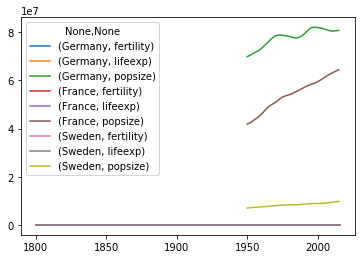

In [36]:
df4[['Germany', 'France', 'Sweden']].plot()

In [37]:
df5 = df3.unstack(2)  
# index 2 = third column = attributes -> those are'pulled up' 
# on top the unstacked new table


In [38]:
df5.head(3)

fertility  lifeexp    popsize
Afghanistan 1800        7.0    28.21  3280000.0
            1801        7.0    28.20        NaN
            1802        7.0    28.19        NaN

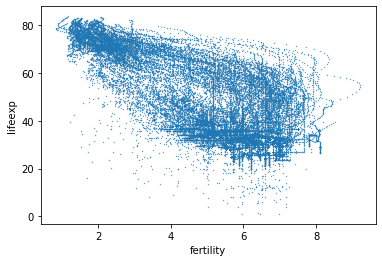

In [39]:
df5.plot.scatter('fertility', 'lifeexp', s=0.1)  
#s= determines the size of the points

In [40]:
df6 = df3.unstack(1)
# index 1 = second column = years
# years will be on top of the new table

In [41]:
df6.head(4)

1800  1801   1802   1803   1804   1805  \
Afghanistan           fertility        7.00   7.0   7.00   7.00   7.00   7.00   
                      lifeexp         28.21  28.2  28.19  28.18  28.17  28.16   
                      popsize    3280000.00   NaN    NaN    NaN    NaN    NaN   
Akrotiri and Dhekelia popsize           NaN   NaN    NaN    NaN    NaN    NaN   

                                  1806   1807   1808   1809  ...         2007  \
Afghanistan           fertility   7.00   7.00   7.00   7.00  ...         6.46   
                      lifeexp    28.15  28.14  28.13  28.12  ...        52.40   
                      popsize      NaN    NaN    NaN    NaN  ...  25877544.00   
Akrotiri and Dhekelia popsize      NaN    NaN    NaN    NaN  ...     15700.00   

                                       2008         2009         2010  \
Afghanistan           fertility         6.2         5.93         5.66   
                      lifeexp          52.8        53.30        53.60   
                      popsize    26528741.0  27207291.00  27962207.00   
Akrotiri and Dhekelia popsize       15700.0          NaN          NaN   

                                       2011         2012        2013  \
Afghanistan           fertility         5.4         5.14         4.9   
                      lifeexp          54.0        54.40        54.8   
                      popsize    28809167.0  29726803.00  30682500.0   
Akrotiri and Dhekelia popsize           NaN          NaN         NaN   

                                        2014         2015   2016  
Afghanistan           fertility         4.68         4.47    NaN  
                      lifeexp          54.90        53.80  52.72  
                      popsize    31627506.00  32526562.00    NaN  
Akrotiri and Dhekelia popsize            NaN          NaN    NaN  

[4 rows x 217 columns]

In [42]:
df_6 = df6[1950]

In [43]:
df_6_2 = df_6.unstack(1)
# index 1 = second column = attributes
# attributes will go on top of the new table:

In [44]:
df_6_2.head(10) #this only describes 1950:

,fertility,lifeexp,popsize
Afghanistan,7.67,26.85,7752118.0
Akrotiri and Dhekelia,NaN,NaN,10661.0
Albania,5.80,54.48,1263171.0
Algeria,7.65,42.77,8872247.0
American Samoa,NaN,NaN,18937.0
Andorra,NaN,NaN,6197.0
Angola,6.93,30.70,4354882.0
Anguilla,NaN,NaN,5121.0
Antigua and Barbuda,4.45,57.97,46301.0
Argentina,3.16,61.61,17150335.0


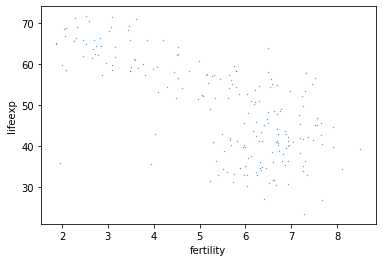

In [45]:
df_6_2.plot.scatter('fertility', 'lifeexp', s=0.1)

#### this plot shows that in 1950, the more children a women had, the shorter the life expectancy

## Step 9

In [46]:
cmap = plt.get_cmap('tab20', lut=len(df_6_2)).colors
# this creates a colormap with as many values as data points in df_6_2
# lut= number of values
# name = if name is None: rc color scheme

In [47]:
cmap

array([[0.12156863, 0.46666667, 0.70588235, 1.        ],
       [0.12156863, 0.46666667, 0.70588235, 1.        ],
       [0.12156863, 0.46666667, 0.70588235, 1.        ],
       ...,
       [0.61960784, 0.85490196, 0.89803922, 1.        ],
       [0.61960784, 0.85490196, 0.89803922, 1.        ],
       [0.61960784, 0.85490196, 0.89803922, 1.        ]])

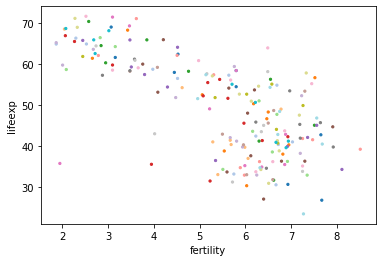

In [48]:
df_6_2.plot.scatter('fertility', 'lifeexp', s=5, c=cmap)

## Step 10

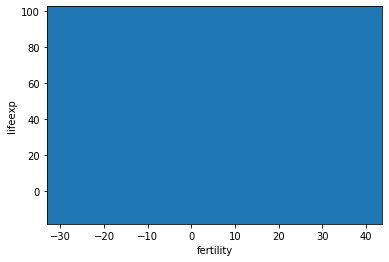

In [49]:
df_6_2.plot.scatter('fertility', 'lifeexp', s=df_6_2['popsize'])

# as dots are now as large as the population size (millions)
# they cover the entire surface

## Step 11

In [50]:
df_6_2.sample(10)
# gives 10 random examples

,fertility,lifeexp,popsize
United Arab Emirates,6.94,41.23,69590.0
Belgium,2.30,66.32,8628489.0
French Polynesia,5.97,45.60,60268.0
Israel,4.52,64.09,1257971.0
Qatar,6.97,53.47,24999.0
Kiribati,5.67,42.08,33050.0
Isle of Man,NaN,NaN,55253.0
Lithuania,2.68,63.59,2567402.0
Reunion,7.19,45.31,248111.0
Suriname,6.58,55.12,214999.0


In [51]:
df_6_3 = df_6_2['popsize']/1000000

In [52]:
df_6_3.head(10)

Afghanistan               7.752118
Akrotiri and Dhekelia     0.010661
Albania                   1.263171
Algeria                   8.872247
American Samoa            0.018937
Andorra                   0.006197
Angola                    4.354882
Anguilla                  0.005121
Antigua and Barbuda       0.046301
Argentina                17.150335
Name: popsize, dtype: float64

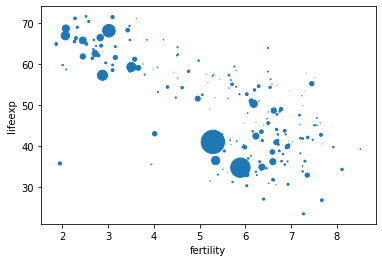

In [53]:
df_6_2.plot.scatter('fertility', 'lifeexp', s=df_6_3)

## Step 12

In [91]:
# years = list(df6.columns) would take all years from 1800 on
years = list(range(1960, 2016))

In [92]:
import imageio
from pygifsicle import optimize

In [93]:
images = []

/opt/anaconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/core.py:320: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


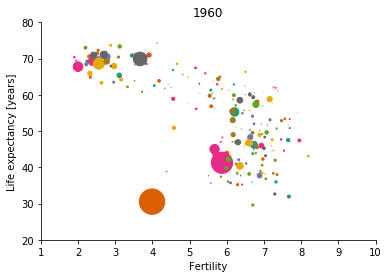

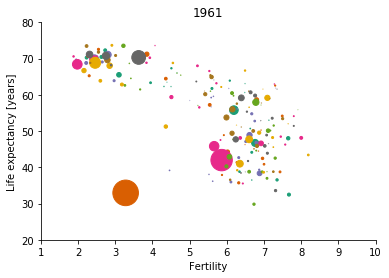

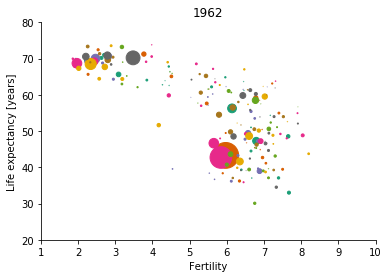

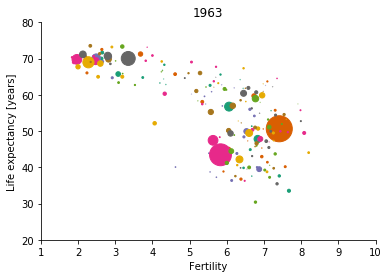

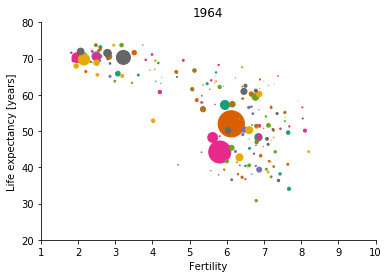

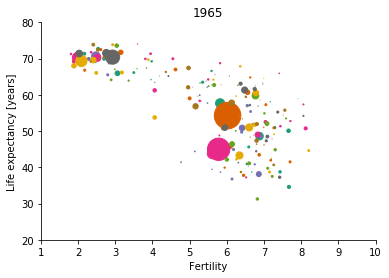

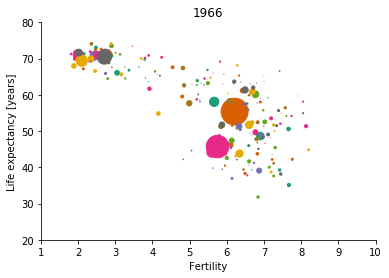

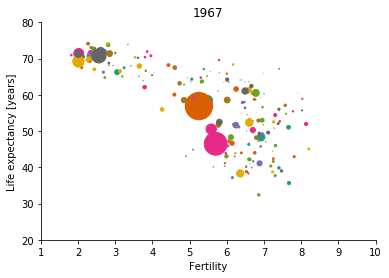

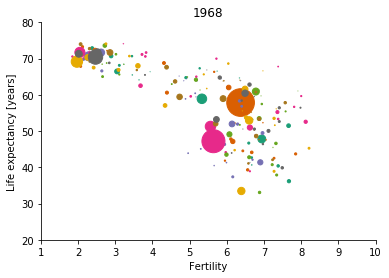

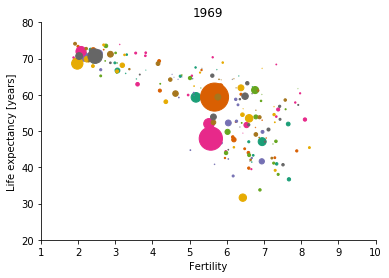

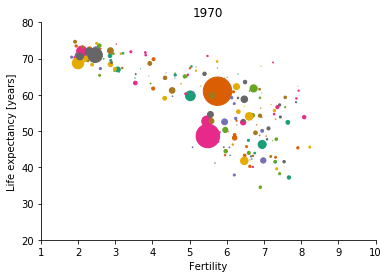

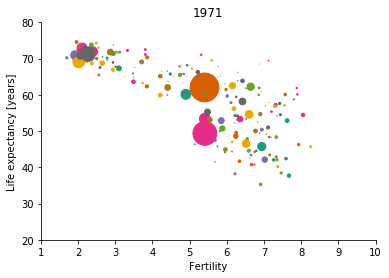

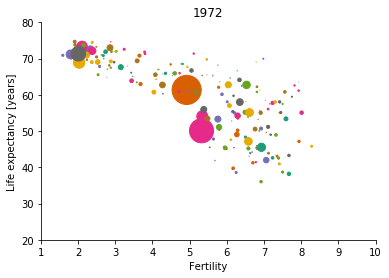

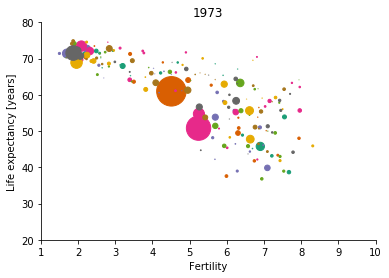

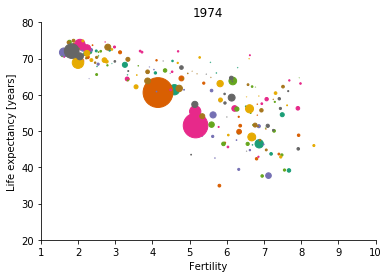

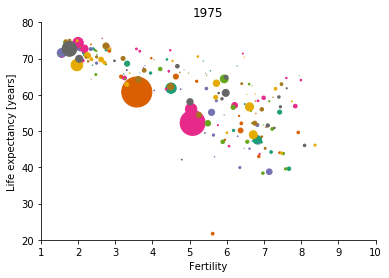

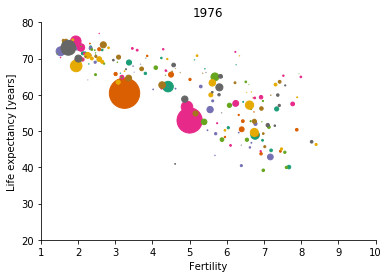

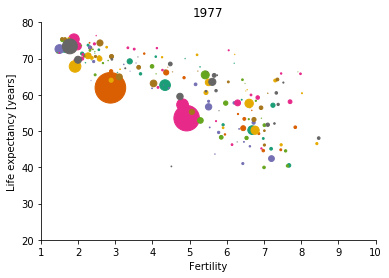

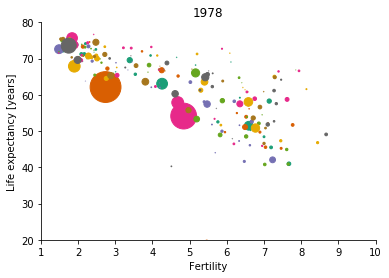

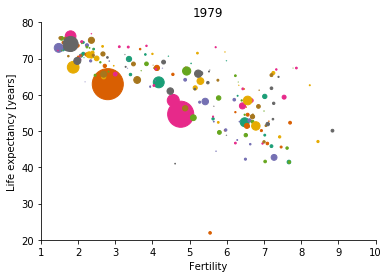

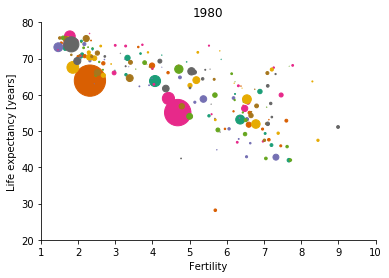

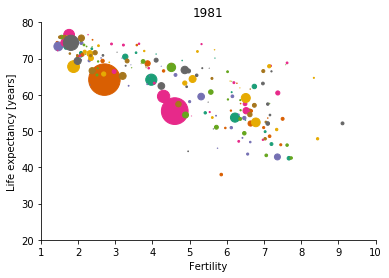

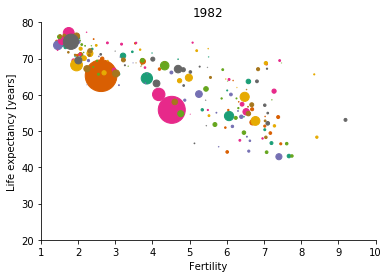

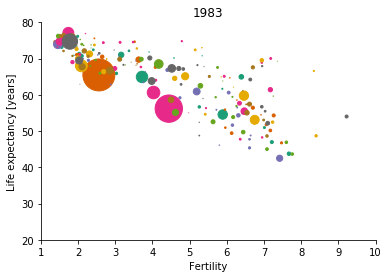

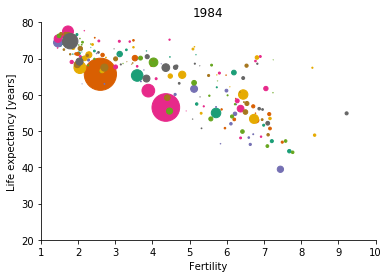

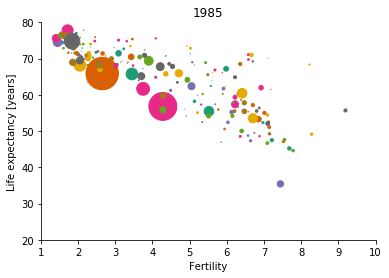

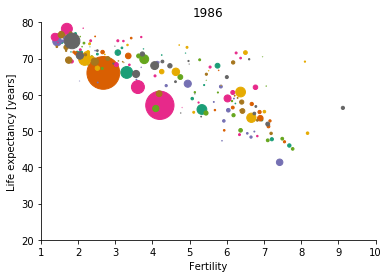

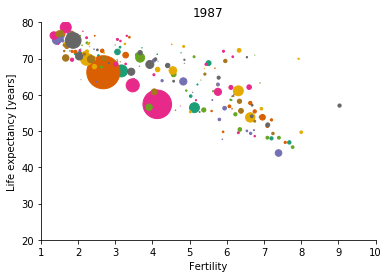

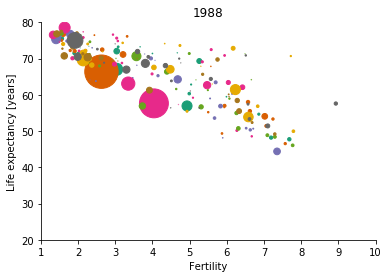

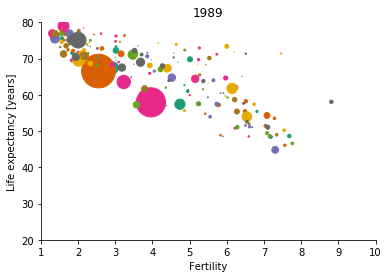

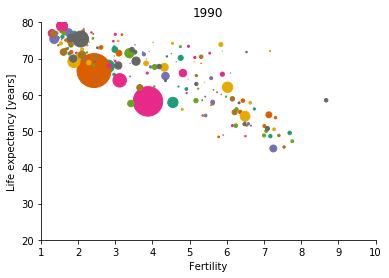

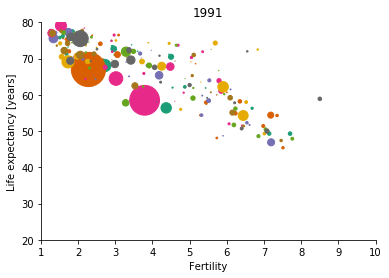

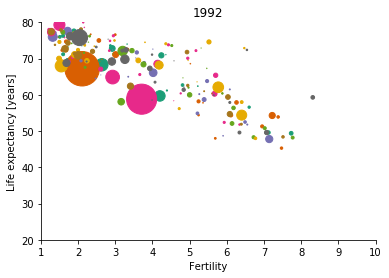

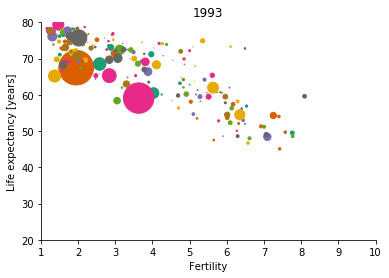

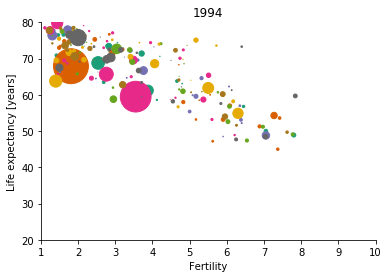

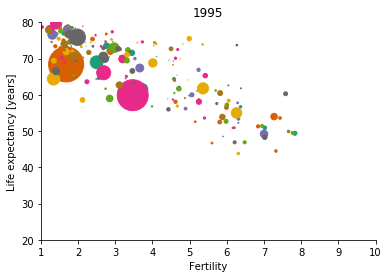

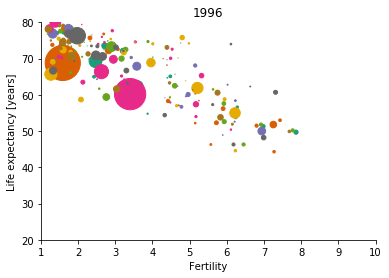

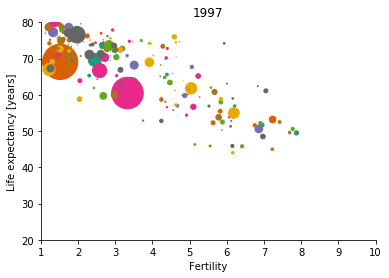

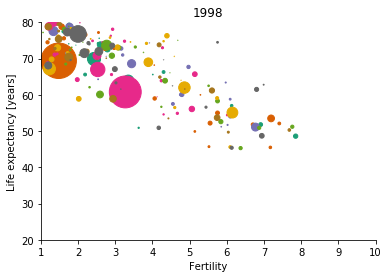

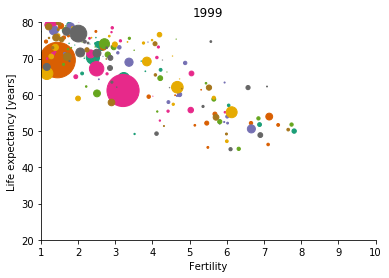

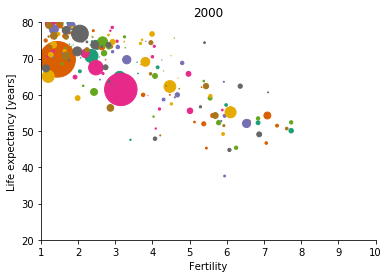

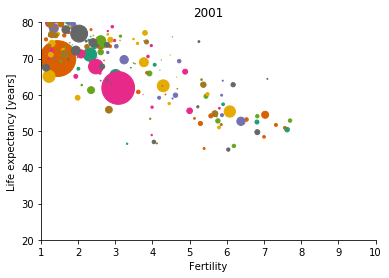

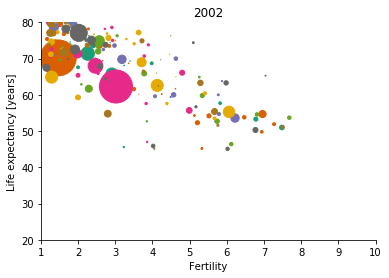

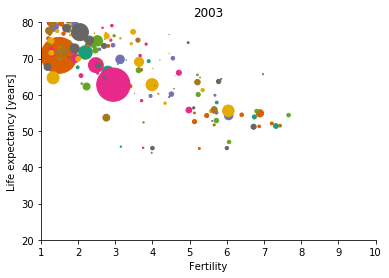

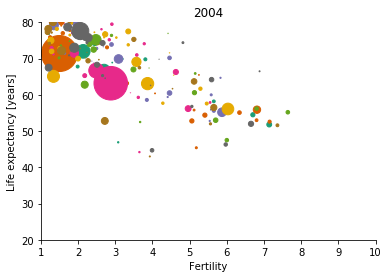

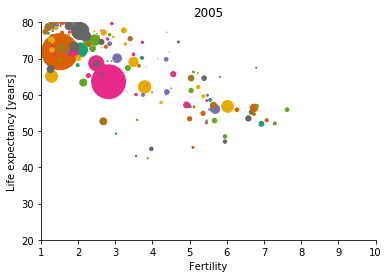

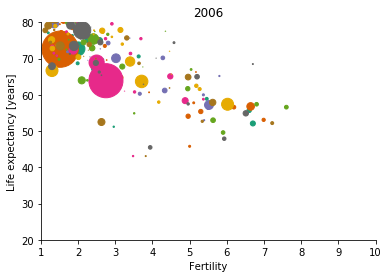

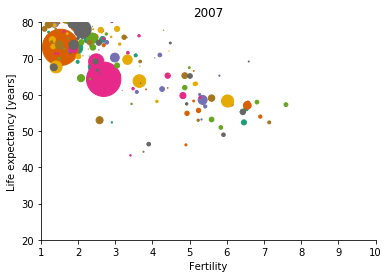

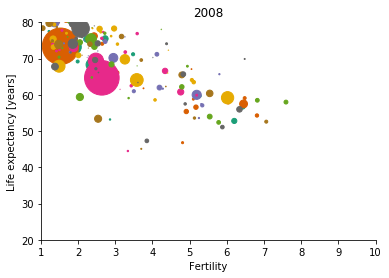

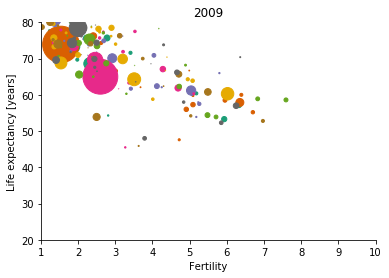

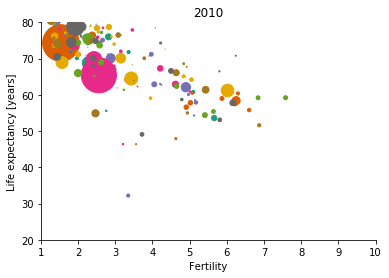

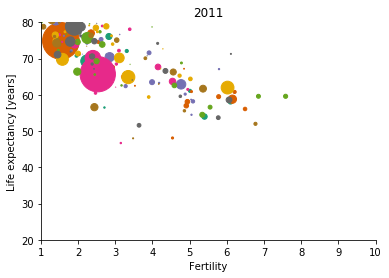

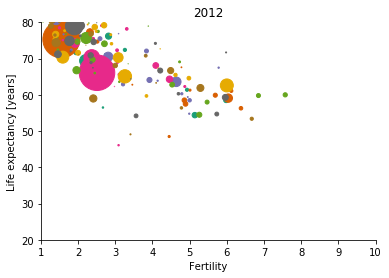

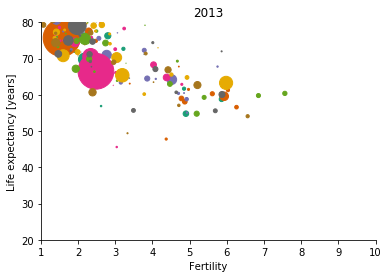

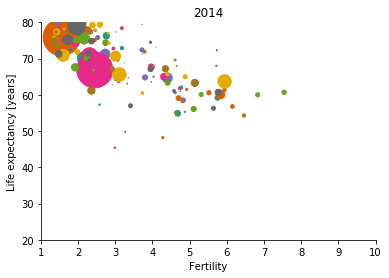

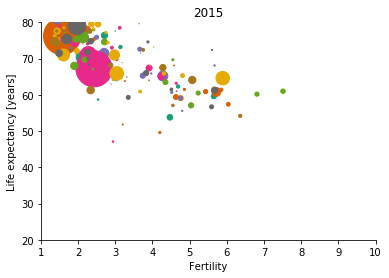

In [94]:
for i in years:
    dfperyear = df6[i]
    dfperyear_unstacked = dfperyear.unstack(1)
    dotsize = dfperyear_unstacked['popsize']/1000000
    dotsize.fillna(0.0005)
    cmap = plt.get_cmap('Dark2', lut=len(dfperyear_unstacked)).colors
    
    fig = dfperyear_unstacked.plot.scatter('fertility', 'lifeexp', s=dotsize, c=cmap)
    plt.xlim(1, 10)
    plt.ylim(20, 80)
    plt.title(str(i))
    plt.xlabel('Fertility')
    plt.ylabel('Life expectancy [years]')
    right_side = fig.spines["right"]
    right_side.set_visible(False)
    top_side = fig.spines["top"]
    top_side.set_visible(False)
    plt.savefig('{}_Hans.png'.format(i), dpi=150) 


    
    

In [95]:
for i in range(1960, 2016):
    filename = '{}_Hans.png'.format(i)
    images.append(imageio.imread(filename))

imageio.mimsave('HansRosling5.gif', images, fps=20)

In [96]:
gif_path = "HansRosling5.gif"
optimize(gif_path, "Optimized_Hans.gif")